<a href="https://colab.research.google.com/github/AjinJayan/super/blob/master/NXP%20REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

#race = pd.read_csv("/content/race.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1'])
race = pd.read_csv("/content/data.csv")
#race = race.reset_index()
#race = race.drop(['index'],axis=1)
race

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
0,0.743291,0.035443,4,52,23,0,70,52,49,0
1,0.743291,0.035443,4,52,23,0,70,52,49,0
2,0.743291,0.035443,4,52,23,0,70,52,49,0
3,0.743291,0.035443,4,52,23,0,70,52,49,0
4,0.743291,0.035443,4,52,23,0,70,52,49,0
...,...,...,...,...,...,...,...,...,...,...
3637,0.791899,0.005063,14,52,26,0,72,36,52,0
3638,0.791899,0.005063,14,52,26,0,72,36,52,0
3639,0.791899,0.005063,14,52,26,0,72,36,52,0
3640,0.791899,0.005063,14,52,26,0,72,36,52,0


In [ ]:
race.describe()

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,0.726086,-0.003451,15.431356,49.572762,25.331686,2.155958,68.185612,34.143328,49.374794,0.642504
std,0.117512,0.086700,8.877038,10.970776,9.114839,9.760007,15.385020,10.694905,12.255221,5.745125
min,0.184586,-0.384634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.718987,-0.010127,12.000000,52.000000,24.000000,0.000000,72.000000,32.000000,49.000000,0.000000
50%,0.775696,-0.000000,13.000000,52.000000,27.000000,0.000000,72.000000,36.000000,52.000000,0.000000
75%,0.791899,0.025316,16.000000,52.000000,28.000000,0.000000,72.000000,38.000000,53.000000,0.000000
max,0.800000,0.212658,57.000000,52.000000,56.000000,51.000000,72.000000,52.000000,72.000000,52.000000


In [ ]:
from sklearn.model_selection import train_test_split
race = race.drop(['speed'],axis=1)
X = race.drop(['steer'],axis=1)
y = race[['steer']]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.10, random_state=42)

In [ ]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
#training
model = XGBRegressor(n_estimators=1000, max_depth=7, learning_rate=0.01)
model = MultiOutputRegressor(model)
model.fit(X_train, y_train)
#preds = model.predict(X_test)

[06:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=7,
                                            min_child_weight=1, missing=None,
                                            n_estimators=1000, n_jobs=1,
                                            nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
    

In [ ]:
#saving
import pickle
pickle.dump(model, open('xgb18.pkl', "wb"))

In [ ]:
#importing model
xgb_model_loaded = pickle.load(open('xgb18.pkl', "rb"))
xgb_model_loaded

[06:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=7,
                                            min_child_weight=1, missing=nan,
                                            n_estimators=1000, n_jobs=1,
                                            nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
     

In [ ]:
#preds = model.predict(X_test)
preds = xgb_model_loaded.predict(X_test)

In [ ]:
preds[:20].round(3), y_test[:20].round(3)

(array([[ 0.062],
        [ 0.005],
        [ 0.   ],
        [ 0.   ],
        [ 0.03 ],
        [-0.292],
        [ 0.055],
        [ 0.005],
        [ 0.   ],
        [ 0.   ],
        [-0.005],
        [ 0.   ],
        [ 0.03 ],
        [ 0.02 ],
        [-0.086],
        [ 0.036],
        [-0.096],
        [ 0.025],
        [ 0.01 ],
        [ 0.01 ]], dtype=float32),       steer
 415   0.061
 3252  0.005
 3193 -0.000
 298  -0.000
 1874  0.030
 2691 -0.292
 32    0.056
 2862  0.005
 2629 -0.000
 3038 -0.000
 657  -0.005
 2972 -0.000
 2538  0.030
 2335  0.020
 1831 -0.086
 1044  0.035
 2043 -0.096
 1074  0.025
 897   0.010
 3230  0.010)

In [ ]:
#unused codes

In [ ]:
#race = pd.read_csv("/content/race generated.csv")
#race = pd.read_csv("/content/race combined org.csv")

#Data
race = pd.read_csv("/content/data race.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1'])
race = race.append(pd.read_csv("/content/data race 2.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
race = race.append(pd.read_csv("/content/data race 3.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
#race = race.append(pd.read_csv("/content/pred.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
#race = race.append(pd.read_csv("/content/generated_08.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
#race = race.append(pd.read_csv("/content/generated_85.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
#ace = race.append(pd.read_csv("/content/data.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
race = race.reset_index()
race = race.drop(['index'],axis=1)
race

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
0,0.0,0.0,7,86,38,0,116,86,82,0
1,0.0,0.0,7,86,38,0,116,86,82,0
2,0.0,0.0,7,86,38,0,116,86,82,0
3,0.0,0.0,7,86,38,0,116,86,82,0
4,0.0,0.0,7,86,38,0,117,86,82,0
...,...,...,...,...,...,...,...,...,...,...
182903,0.3,0.0,36,0,0,87,128,108,90,0
182904,0.3,0.0,36,0,0,87,128,108,90,0
182905,0.3,0.0,36,0,0,87,128,108,90,0
182906,0.3,0.0,36,0,0,87,128,108,90,0


In [ ]:
race.to_csv('2_3 data.csv')

In [ ]:
race2 = pd.read_csv("/content/data race.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1'])
race2 = race.append(pd.read_csv("/content/data race 2.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
race2 = race.append(pd.read_csv("/content/data race 3.csv", names = ['speed','steer','m0_x0','m0_y0','m0_x1','m0_y1','m1_x0','m1_y0','m1_x1','m1_y1']))
race2 = race2.reset_index()
race2 = race2.drop(['index'],axis=1)
race2

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
0,0.0,0.0,7,86,38,0,116,86,82,0
1,0.0,0.0,7,86,38,0,116,86,82,0
2,0.0,0.0,7,86,38,0,116,86,82,0
3,0.0,0.0,7,86,38,0,116,86,82,0
4,0.0,0.0,7,86,38,0,117,86,82,0
...,...,...,...,...,...,...,...,...,...,...
182903,0.3,0.0,36,0,0,87,128,108,90,0
182904,0.3,0.0,36,0,0,87,128,108,90,0
182905,0.3,0.0,36,0,0,87,128,108,90,0
182906,0.3,0.0,36,0,0,87,128,108,90,0


In [ ]:
import math
race['m1'] = (race['m0_y0']-race['m0_y1'])/(race['m0_x0']-race['m0_x1'])
race['m2'] = (race['m1_y0']-race['m1_y1'])/(race['m1_x0']-race['m1_x1'])
race = race.reset_index()
race = race.drop(['index'],axis=1)
race

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1,m1,m2
0,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000
1,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000
2,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000
3,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000
4,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
107957,0.8,0.0,21,0,0,44,61,52,47,0,-2.095238,3.714286
107958,0.8,0.0,21,0,0,44,61,52,47,0,-2.095238,3.714286
107959,0.8,0.0,21,0,0,44,62,52,47,0,-2.095238,3.466667
107960,0.8,0.0,21,0,0,44,62,52,47,0,-2.095238,3.466667


In [ ]:
angle = []
for i in range(len(race)):
  angle.append(math.degrees(math.atan(((race['m1'][i]-race['m2'][i])/(1+race['m1'][i]*race['m2'][i])))))
race['angle'] = angle
race

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1,m1,m2,angle
0,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000,41.109037
1,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000,41.109037
2,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000,41.109037
3,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000,41.109037
4,0.0,0.0,4,52,23,0,69,52,49,0,-2.736842,2.600000,41.109037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107957,0.8,0.0,21,0,0,44,61,52,47,0,-2.095238,3.714286,40.582359
107958,0.8,0.0,21,0,0,44,61,52,47,0,-2.095238,3.714286,40.582359
107959,0.8,0.0,21,0,0,44,62,52,47,0,-2.095238,3.466667,41.604687
107960,0.8,0.0,21,0,0,44,62,52,47,0,-2.095238,3.466667,41.604687


In [ ]:
import math
d1 = []
d2 = []
for i in range(len(race)):
  d1.append((math.sqrt(pow((race['m0_x0'][i]-race['m0_x1'][i]),2) + pow((race['m0_y0'][i]-race['m0_y1'][i]),2))))
  d2.append((math.sqrt(pow((race['m1_x0'][i]-race['m1_x1'][i]),2) + pow((race['m1_y0'][i]-race['m1_y1'][i]),2))))
race['d1'] = d1
race['d2'] = d2

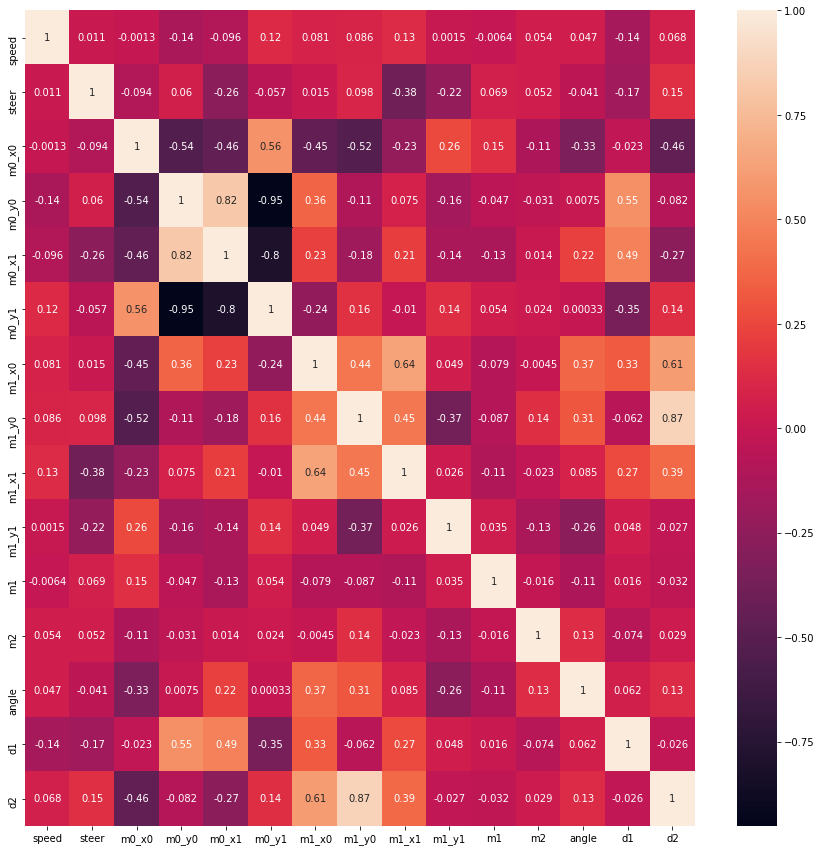

In [ ]:
corrMatrix = race.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)

In [ ]:
race2.describe()

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
count,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000
mean,0.551608,0.149305,61.197575,74.070987,29.243724,17.691851,95.413951,68.469302,67.449209,0.915772
std,0.327869,0.235819,60.909339,40.063443,20.336253,35.043447,64.153898,47.212477,46.527259,9.790109
min,0.000000,-0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.000000,9.000000,72.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,37.000000,86.000000,24.000000,0.000000,132.000000,92.000000,90.000000,0.000000
75%,0.850000,0.500000,150.000000,108.000000,46.000000,0.000000,147.000000,108.000000,102.000000,0.000000
max,1.500000,0.550000,150.000000,108.000000,148.000000,108.000000,150.000000,108.000000,150.000000,108.000000


In [ ]:
for i in range(len(race2)):
  race2['m0_x0'][i] = ((race2['m0_x0'][i]-race2['m0_x0'].min())/(race2['m0_x0'].max()-race2['m0_x0'].min())*(race['m0_x0'].max())-race['m0_x0'].min())+race['speed'].min()
  race2['m0_y0'][i] = ((race2['m0_y0'][i]-race2['m0_y0'].min())/(race2['m0_y0'].max()-race2['m0_y0'].min())*(race['m0_y0'].max())-race['m0_y0'].min())+race['speed'].min()
  race2['m0_x1'][i] = ((race2['m0_x1'][i]-race2['m0_x1'].min())/(race2['m0_x1'].max()-race2['m0_x1'].min())*(race['m0_x1'].max())-race['m0_x1'].min())+race['speed'].min()
  race2['m0_y1'][i] = ((race2['m0_y1'][i]-race2['m0_y1'].min())/(race2['m0_y1'].max()-race2['m0_y1'].min())*(race['m0_y1'].max())-race['m0_y1'].min())+race['speed'].min()
  race2['m1_x0'][i] = ((race2['m1_x0'][i]-race2['m1_x0'].min())/(race2['m1_x0'].max()-race2['m1_x0'].min())*(race['m1_x0'].max())-race['m1_x0'].min())+race['speed'].min()
  race2['m1_y0'][i] = ((race2['m1_y0'][i]-race2['m1_y0'].min())/(race2['m1_y0'].max()-race2['m1_y0'].min())*(race['m1_y0'].max())-race['m1_y0'].min())+race['speed'].min()
  race2['m1_x1'][i] = ((race2['m1_x1'][i]-race2['m1_x1'].min())/(race2['m1_x1'].max()-race2['m1_x1'].min())*(race['m1_x1'].max())-race['m1_x1'].min())+race['speed'].min()
  race2['m1_y1'][i] = ((race2['m1_y1'][i]-race2['m1_y1'].min())/(race2['m1_y1'].max()-race2['m1_y1'].min())*(race['m1_y1'].max())-race['m1_y1'].min())+race['speed'].min()
race2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
0,0.0,0.0,2,40,17,0,54,40,38,0
1,0.0,0.0,2,40,17,0,54,40,38,0
2,0.0,0.0,2,40,17,0,54,40,38,0
3,0.0,0.0,2,40,17,0,54,40,38,0
4,0.0,0.0,2,40,17,0,55,40,38,0
...,...,...,...,...,...,...,...,...,...,...
182903,0.3,0.0,35,0,0,51,71,51,71,0
182904,0.3,0.0,35,0,0,51,71,51,71,0
182905,0.3,0.0,35,0,0,51,71,51,71,0
182906,0.3,0.0,35,0,0,51,71,51,71,0


In [ ]:
#race2.to_csv('race generated.csv')
race.to_csv('race all data.csv')

In [ ]:
race2.describe()

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
count,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000,182908.000000
mean,0.551608,0.149305,28.369973,34.638414,16.536811,8.368890,44.997288,32.203944,31.586235,0.431742
std,0.327869,0.235819,29.222937,18.925218,11.288650,16.627335,30.282532,22.269171,21.849359,4.617023
min,0.000000,-0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.000000,3.000000,33.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,17.000000,40.000000,16.000000,0.000000,62.000000,43.000000,42.000000,0.000000
75%,0.850000,0.500000,71.000000,51.000000,24.000000,0.000000,69.000000,51.000000,48.000000,0.000000
max,1.500000,0.550000,71.000000,51.000000,71.000000,51.000000,71.000000,51.000000,71.000000,51.000000


In [ ]:
race4 = np.array(race2)
race2['speed'][0]

0.0

In [ ]:
#frame_width = 79
#frame_height = 52
#x = []
#y = []
#for i in range(len(Data)):
#  if(Data['m0_x1'][i] > Data['m0_x0'][i]):
#      x.append((Data['m0_x1'][i] - Data['m0_x0'][i]) / frame_width)
#      y.append((Data['m0_y1'][i] - Data['m0_y0'][i]) / frame_height)
#  else:
#      x.append((Data['m0_x0'][i] - Data['m0_x1'][i]) / frame_width)
#      y.append((Data['m0_y0'][i] - Data['m0_y1'][i]) / frame_height)

In [ ]:
race['d2'].isna().sum()

0

In [ ]:
race = race.drop(['m1','m2'],axis=1)
race

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1,angle,d1,d2
0,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
1,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
2,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
3,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
4,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56212,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317
56213,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317
56214,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317
56215,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317


In [ ]:
race = race.dropna()
race

,speed,steer,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1,angle,d1,d2
0,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
1,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
2,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
3,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
4,0.00,0.00,4,52,23,0,69,52,49,0,41.109037,55.362442,55.713553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56212,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317
56213,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317
56214,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317
56215,0.65,0.05,20,0,0,47,63,52,46,0,41.155064,51.078371,54.708317


In [ ]:
from sklearn import preprocessing

normalized = preprocessing.normalize(race)
normalized.shape

(53298, 15)

In [ ]:
X_train

,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1
49938,36,0,0,38,55,52,66,0
133568,71,33,16,0,0,0,0,0
63636,15,0,0,38,62,52,40,0
147658,71,33,16,0,0,0,0,0
55340,21,0,0,49,66,51,47,0
...,...,...,...,...,...,...,...,...
119879,71,33,16,0,0,0,0,0
103694,5,51,40,0,71,44,59,0
131932,71,33,16,0,0,0,0,0
146867,71,33,16,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test)
X.shape, y.shape

((164617, 10), (164617, 2))

In [ ]:
df = np.array([[13,12,32,41,33,112,12,1,2]])
st = sc_X.fit_transform(df.reshape(-1, 1))
st = np.array([st])
y_pred = sc_y.inverse_transform([st])
df,st,y_pred

ValueError: ignored

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

ValueError: ignored

In [ ]:
m0_x0=16
m0_y0=52
m0_x1=20
m0_y1=0
m1_x0=72
m1_y0=35
m1_x1=47
m1_y1=0

In [ ]:
df = pd.DataFrame({
                   'm0_x0': m0_x1,
                   'm0_y0': m0_y0,
                   'm0_x1': m0_x1,
                   'm0_y1': m0_y1,
                   'm1_x0': m1_x0,
                   'm1_y0': m1_y0,
                   'm1_x1': m1_x1,
                   'm1_y1': m1_y1,
                   'd1':10,
                   'd2':20
                   #'x': vector_x(m0_x0,	m0_x1),
                   #'y': vector_y(m0_x0,	m0_x1, m0_y0, m0_y1)
                   }, index=[0])

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred[:,:1],pred[:,1:]

(array([[0.56712437]], dtype=float32), array([[0.14161265]], dtype=float32))

In [ ]:
X_train.head(), y_train.head()

(       speed  m0_x0  m0_y0  m0_x1  m0_y1  m1_x0  m1_y0  m1_x1  m1_y1
 33124   0.90     57      0      0     99    125    108    117      0
 34365   0.85     32    108      0     16    150     78     62      0
 8907    0.55     41      0      0     74    106     86     83      0
 8920    0.55      2     86     40      0    112     86     83      0
 9803    0.35     11     86     54      0    120     74     97      0,
        steer
 33124  -0.05
 34365   0.20
 8907    0.00
 8920    0.00
 9803   -0.10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred = regressor.predict(X_test)
pred[:20].round(3) ,y_test[:20]

(array([[ 0.795,  0.003],
        [ 0.15 ,  0.496],
        [ 0.803, -0.062],
        [ 0.15 ,  0.496],
        [ 0.15 ,  0.496],
        [ 0.346, -0.006],
        [ 0.823, -0.004],
        [ 0.844, -0.028],
        [ 0.15 ,  0.496],
        [ 0.743,  0.   ],
        [ 0.803, -0.19 ],
        [ 0.753, -0.011],
        [ 0.832, -0.03 ],
        [ 0.225, -0.003],
        [ 0.15 ,  0.496],
        [ 0.731, -0.006],
        [ 0.15 ,  0.496],
        [ 0.15 ,  0.496],
        [ 0.361,  0.024],
        [ 0.4  , -0.017]]),         speed  steer
 20482    0.65   0.00
 156739   0.15   0.50
 41754    0.85  -0.05
 136801   0.15   0.50
 150046   0.15   0.50
 96701    0.30   0.00
 93249    0.90   0.00
 99929    0.95  -0.05
 126291   0.15   0.50
 95560    0.85  -0.05
 61865    0.80  -0.20
 41997    0.50   0.00
 168096   0.55  -0.05
 19375    0.00   0.00
 120916   0.15   0.50
 176007   1.30  -0.05
 164358   0.15   0.50
 141658   0.15   0.50
 573      0.40   0.05
 78163    0.40  -0.05)

In [ ]:
import pickle
pickle.dump(regressor, open('forest.pkl', "wb"))
xgb_model_loaded = pickle.load(open('forest.pkl', "rb"))

In [ ]:
pred = xgb_model_loaded.predict(df)
pred

array([[0.381     , 0.17570415]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import LeakyReLU

	# create model
model = Sequential()
model.add(Dense(64, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='relu'))
# Compile model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_57 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 66        
Total params: 2,914
Trainable params: 2,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2298
Epoch 2/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0311
Epoch 3/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0265
Epoch 4/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0261
Epoch 5/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0261
Epoch 6/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0247
Epoch 7/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0235
Epoch 8/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0226
Epoch 9/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0230
Epoch 10/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0223
Epoch 11/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.0222
Epoch 12/100
1333/1333 [==============================] - 2s 1ms/step - lo

In [ ]:
history.history['accuracy']

KeyError: ignored

In [ ]:
model.evaluate(X_test, y_test)

334/334 [==============================] - 0s 1ms/step - loss: 0.0435


0.04346046224236488

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:20],y_test[:20].round(3)

(array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),        speed  steer
 36693   0.75   0.00
 25251   0.00   0.00
 41335   0.80  -0.10
 51496   0.75   0.05
 26021   0.85   0.20
 34557   1.10   0.00
 6963    0.80   0.10
 55105   0.65   0.00
 42835   1.00   0.05
 47703   0.65   0.00
 3423    1.00   0.00
 40032   0.95   0.00
 44020   0.65  -0.20
 49938   0.75  -0.20
 37128   0.85   0.00
 5407    0.70  -0.10
 46297   1.10   0.00
 15448   0.90   0.00
 22923   0.95   0.00
 35719   0.95  -0.10)

In [ ]:
model.save('NN_model2.h5')

In [ ]:
from keras.models import load_model
model_new = load_model("NN_model1.h5")

In [ ]:
y_pred = model_new.predict(X_test)

In [ ]:
X_test[:2]

,m0_x0,m0_y0,m0_x1,m0_y1,m1_x0,m1_y0,m1_x1,m1_y1,x,y
415,16,52,20,0,72,35,47,0,0.050633,-1.0
3252,16,52,26,0,72,32,52,0,0.126582,-1.0


In [ ]:
def vector_x(m0_x0,	m0_x1):
  frame_width = 79
  if(m0_x1 > m0_x0):
      x = (m0_x1 - m0_x0) / frame_width
  else:
      x = (m0_x0 - m0_x1) / frame_width
  return x

def vector_y(m0_x0,	m0_x1, m0_y0, m0_y1):
  frame_height = 52
  if(m0_x1 > m0_x0):
      y = (m0_y1 - m0_y0) / frame_height
  else:
      y = (m0_y0 - m0_y1) / frame_height
  return y

In [ ]:
model_new = load_model('NN_model1.h5')

NameError: ignored

In [ ]:
m0_x0, m0_y0, m0_x1, m0_y1, m1_x0, m1_y0, m1_x1, m1_y1

In [ ]:
from keras.models import load_model
model = pickle.load(open(file_name, "rb"))
df = ['speed', 'm0_x0', 'm0_y0', 'm0_x1', 'm0_y1', 'm1_x0', 'm1_y0', 'm1_x1', 'm1_y1'],[0,8,30,52,20,1,75,35,47,0]
df = np.array(df)

[04:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


TypeError: ignored

In [ ]:
df

array([list(['speed', 'm0_x0', 'm0_y0', 'm0_x1', 'm0_y1', 'm1_x0', 'm1_y0', 'm1_x1', 'm1_y1']),
       list([0, 8, 30, 52, 20, 1, 75, 35, 47, 0])], dtype=object)

In [ ]:
model.predict(df)

array([0.1577478], dtype=float32)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
steer = (df.values.sum())/(df.values.sum()+500)

0.3297587131367292

In [ ]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

[11:09:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
pred = model.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
import pickle
file_name = "xgb18.pkl"
# save
pickle.dump(model, open(file_name, "wb"))
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

[11:17:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model.save_model("xgb1")

In [ ]:
pred[:20], y_test[:20]

(array([-0.01024741, -0.03901118,  0.00360879, -0.09892142,  0.00504762,
        -0.03581309, -0.01101601, -0.00100344, -0.04199165, -0.01530463,
        -0.04486769,  0.02433002, -0.10016418,  0.09098312, -0.01319069,
        -0.0124864 , -0.00303608,  0.02020893, -0.23303032, -0.24476993],
       dtype=float32),        steer
 12475   0.00
 43748  -0.05
 25982   0.00
 6839   -0.10
 34240   0.00
 17311   0.00
 3609    0.00
 9767    0.00
 30903  -0.05
 19688  -0.05
 41292  -0.05
 45221   0.05
 9186   -0.10
 14811   0.10
 5169    0.00
 40936   0.00
 19217   0.00
 24556   0.00
 49203  -0.20
 40636  -0.25)

In [ ]:
X = np.array(X_train)
y = np.array(y_train)
i = np.array(X_test)
j = np.array(y_test)
X.shape, y.shape, i.shape, j.shape

((47107, 8), (47107, 2), (5235, 8), (5235, 2))

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
# get some noised linear data
X = np.random.random((1000, 10))
a = np.random.random((10, 3))
y = np.dot(X, a) + np.random.normal(0, 1e-3, (1000, 3))

# fitting
multioutputregressor = MultiOutputRegressor(XGBRegressor(objective='reg:linear',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8))

# predicting
#print (np.mean((multioutputregressor.predict(X) - y)**2, axis=0))  # 0.004, 0.003, 0.005)))

In [ ]:
multioutputregressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[03:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8, eta=0.1,
                                            gamma=0, importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=7, min_child_weight=1,
                                            missing=None, n_estimators=1000,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None,
                                            subsamp

In [ ]:
pred = multioutputregressor.predict(i)

ValueError: ignored

In [ ]:
X

array([[3.36107351e-01, 6.31737815e-01, 7.99305261e-01, ...,
        8.25785387e-01, 7.62138883e-02, 6.31940446e-02],
       [1.12920455e-01, 5.52271205e-02, 9.36874743e-01, ...,
        7.17649639e-01, 9.18432875e-01, 7.38351197e-01],
       [2.97329985e-01, 8.56765634e-02, 2.54756180e-01, ...,
        2.47971258e-01, 2.40132190e-01, 5.04132131e-01],
       ...,
       [9.19316413e-02, 5.48324310e-01, 2.71193092e-01, ...,
        7.96259281e-01, 9.91329004e-01, 2.86139663e-01],
       [6.75309163e-01, 5.86886115e-01, 9.29128026e-01, ...,
        4.18466560e-01, 8.77040196e-01, 3.63512820e-01],
       [9.28941364e-01, 2.37244627e-01, 1.03835000e-04, ...,
        3.18335948e-01, 9.72245033e-01, 9.73871487e-01]])

In [ ]:
i.shape

(1, 5235, 8)